**COMPUTER VISION ASSIGNMENT - 4**

**A. Given the image “HM.jpg” (small squares correspond to pixels). Find white pixels, that do not have 4-connected neighboring pixels.**

Hint: Perform Hit-or-Miss transform. Create image matrix similar to HM.jpg and then process. 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

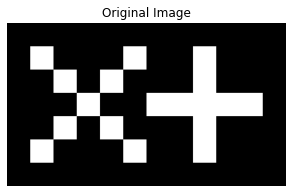

In [3]:
img = cv.imread("/content/gdrive/MyDrive/ComputerVision/HM.jpg", cv.IMREAD_GRAYSCALE)
plt.figure(figsize = (5,5))
plt.title('Original Image')
plt.axis(False)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [4]:
height, width = img.shape
print(height, width)

112 192


In [5]:
img_bin = cv.threshold(img, 127, 1, cv.THRESH_BINARY)[1]

In [6]:
# Define Structuring Elements
se_3x3 = np.ones((3,3),np.uint8)
se_15x15 = np.ones((15,15),np.uint8)

In [7]:
# Perform erosion and dilation
er_3x3 = cv.erode(img_bin,se_3x3, iterations=1)
er_15x15 = cv.erode(img_bin,se_15x15, iterations=1)
dilation_15x15 = cv.dilate(er_15x15,se_15x15, iterations=1)

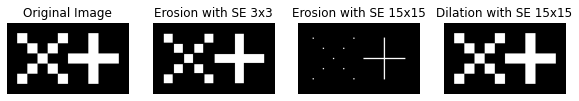

In [9]:
plt.figure(figsize = (10,10))
plt.subplot(1,4,1)
plt.imshow(img_bin, cmap='gray')
plt.title('Original Image')
plt.axis(False)

plt.subplot(1,4,2)
plt.title('Erosion with SE 3x3')
plt.axis(False)

plt.imshow(er_3x3, cmap='gray')
plt.subplot(1,4,3)
plt.title('Erosion with SE 15x15')
plt.axis(False)

plt.imshow(er_15x15, cmap='gray')
plt.subplot(1,4,4)
plt.title('Dilation with SE 15x15')
plt.axis(False)

plt.imshow(dilation_15x15, cmap='gray')
plt.show()


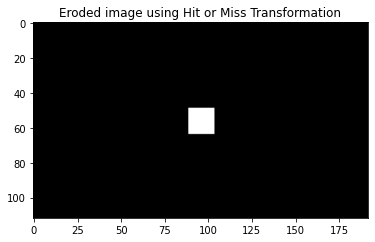

In [11]:
# Apply hit-or-miss transformation
result_img = cv.morphologyEx(img_bin, cv.MORPH_HITMISS, er_15x15)
plt.imshow(result_img, cmap=plt.cm.gray)
plt.title("Eroded image using Hit or Miss Transformation")
plt.show()

B. Given “lena_RGB.tif” image. Perform Prewitt, Sobel and Canny edge Detection. Compare the results.

In [12]:
img = cv.imread("/content/gdrive/MyDrive/ComputerVision/lena_RGB.tif", cv.IMREAD_GRAYSCALE)

In [13]:
img

array([[104, 105, 106, ...,  59,  59,  59],
       [105, 105, 107, ...,  59,  60,  60],
       [105, 105, 107, ...,  60,  60,  60],
       ...,
       [ 89,  96, 107, ...,  20,  23,  30],
       [ 88,  98,  96, ...,  20,  26,  32],
       [ 88,  98, 100, ...,  28,  34,  39]], dtype=uint8)

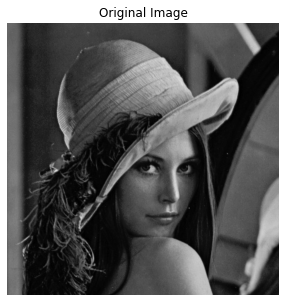

In [14]:
# To show the image
plt.figure(figsize = (5,5))
plt.title('Original Image')
plt.axis(False)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [15]:
height, width = img.shape
print(height, width)

512 512


#Sobel edge detection

(-0.5, 511.5, 511.5, -0.5)

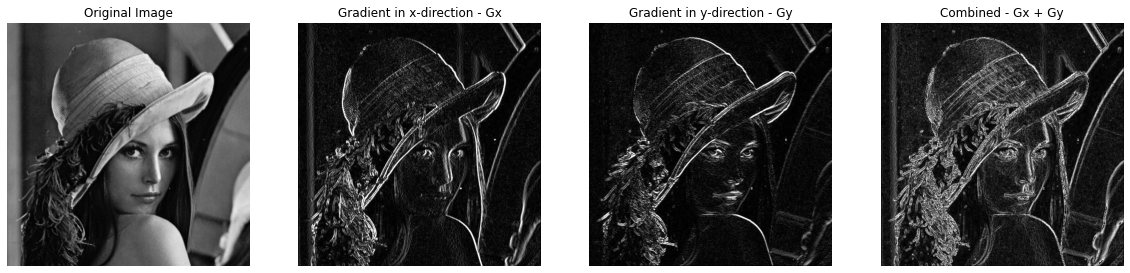

In [16]:
# Sobel Edge Detection - No prior smoothing
img_sobelx = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
img_sobely = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)
img_abs_sobel_x = cv.convertScaleAbs(img_sobelx)
img_abs_sobel_y = cv.convertScaleAbs(img_sobely)
img_abs_sobel_xy = img_abs_sobel_x + img_abs_sobel_y
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(img_abs_sobel_x,cmap="gray")
plt.title("Gradient in x-direction - Gx")
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(img_abs_sobel_y,cmap="gray")
plt.title("Gradient in y-direction - Gy")
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(img_abs_sobel_xy,cmap="gray")
plt.title("Combined - Gx + Gy")
plt.axis("off")

In [19]:
# Sobel Edge Detection - with prior smoothing
# remove noise
img_smooth = cv.GaussianBlur(img,(5,5),0)
img_smooth

array([[105, 105, 106, ...,  59,  59,  60],
       [105, 105, 106, ...,  59,  60,  60],
       [105, 105, 105, ...,  59,  60,  60],
       ...,
       [ 94,  96, 101, ...,  21,  24,  26],
       [ 94,  96, 100, ...,  22,  27,  29],
       [ 94,  96, 100, ...,  24,  28,  30]], dtype=uint8)

(-0.5, 511.5, 511.5, -0.5)

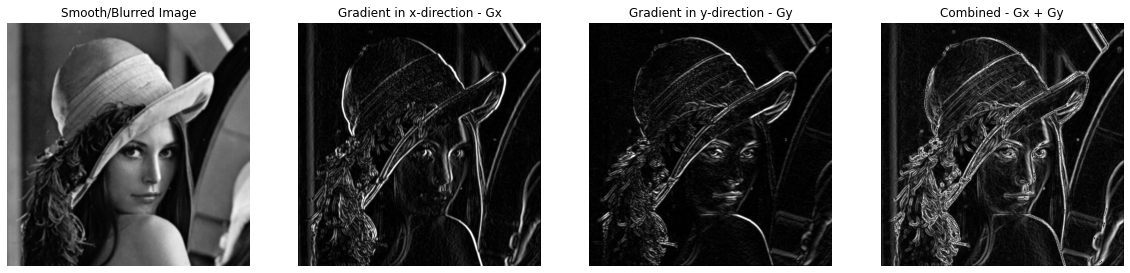

In [21]:
# Sobel Edge Detection
sobelx = cv.Sobel(src=img_smooth, ddepth=cv.CV_64F, dx=1, dy=0, 
ksize=3)
sobely = cv.Sobel(src=img_smooth, ddepth=cv.CV_64F, dx=0, dy=1, 
ksize=3)
sobelxy = cv.Sobel(src=img_smooth, ddepth=cv.CV_64F, dx=1, dy=1, 
ksize=3)
abs_sobel_x = cv.convertScaleAbs(sobelx)
abs_sobel_y = cv.convertScaleAbs(sobely)
abs_sobel_xy = abs_sobel_x + abs_sobel_y
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img_smooth,cmap="gray")
plt.title("Smooth/Blurred Image")
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(abs_sobel_x,cmap="gray")
plt.title("Gradient in x-direction - Gx")
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(abs_sobel_y,cmap="gray")
plt.title("Gradient in y-direction - Gy")
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(abs_sobel_xy,cmap="gray")
plt.title("Combined - Gx + Gy")
plt.axis("off")


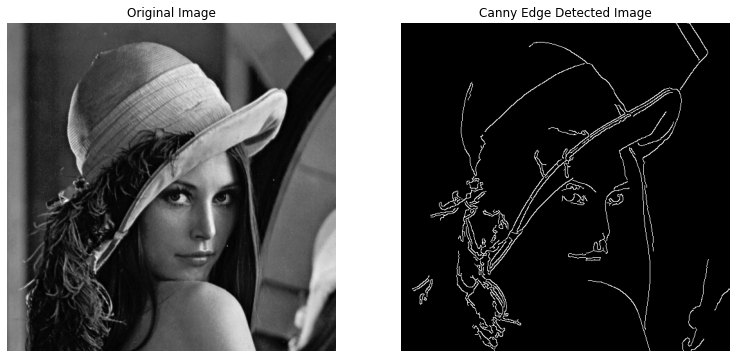

In [22]:
# use Canny edge detection
# chage threshold1 and thresold2 values
canny_image = cv.Canny(img_smooth, threshold1=50, threshold2=230)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(canny_image,cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detected Image")
plt.show()

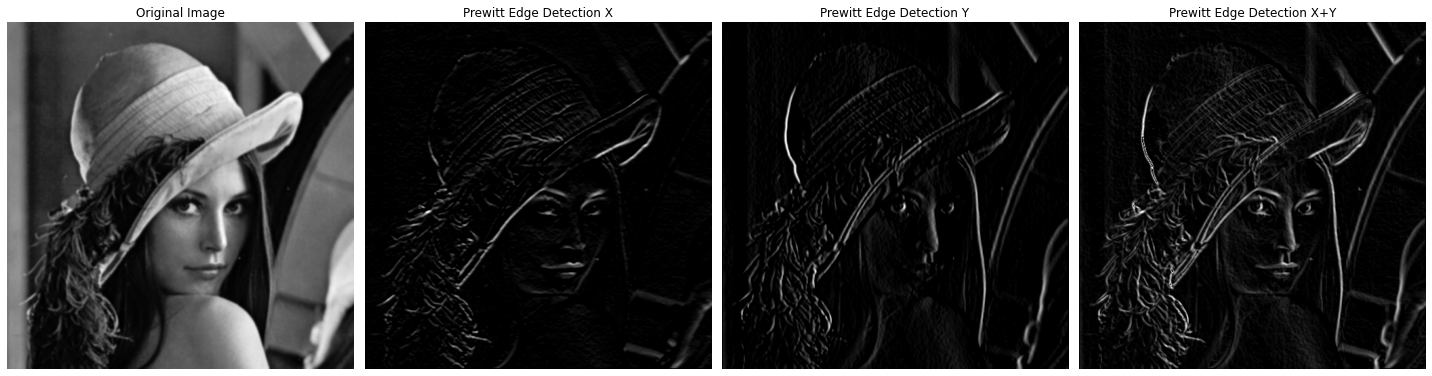

In [24]:
#Prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_smooth, -1, kernelx)
img_prewitty = cv.filter2D(img_smooth, -1, kernely)
fig = plt.figure(figsize=(20,26))
plt.subplot(1,4,1)
plt.imshow(img_smooth, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(img_prewittx, cmap="gray")
plt.title("Prewitt Edge Detection X")
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(img_prewitty, cmap="gray")
plt.title("Prewitt Edge Detection Y")
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(img_prewittx + img_prewitty, cmap="gray")
plt.title("Prewitt Edge Detection X+Y")
plt.axis("off")
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()


#C. Perform Laplacian to sharpen the “moon.tif” image.

In [26]:
img = cv.imread("/content/gdrive/MyDrive/ComputerVision/moon.tif")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

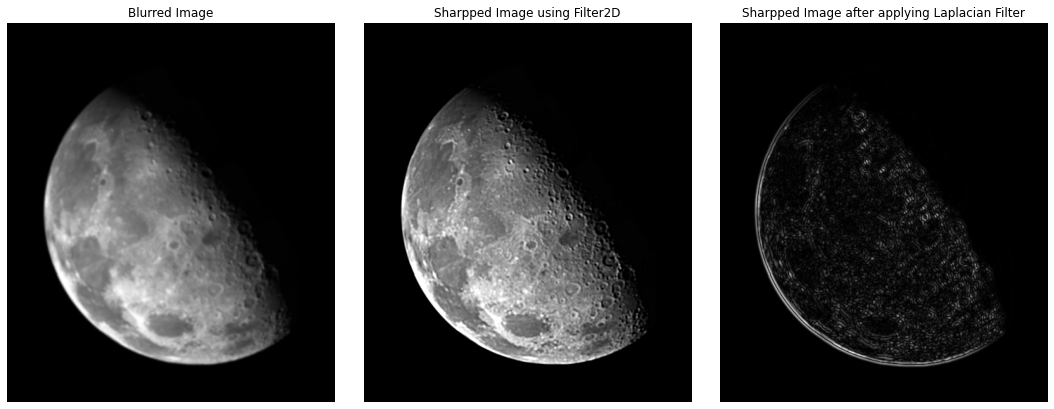

In [28]:
blur = cv.GaussianBlur(img_gray, (5,5), 0)
sharpen_filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharped_img = cv.filter2D(blur, -1, sharpen_filter)
laplace = cv.Laplacian(blur, cv.CV_64F, ksize=5)
laplace_2_abs = np.uint(np.absolute(laplace))
fig = plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(blur, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(sharped_img, cmap="gray")
plt.title("Sharpped Image using Filter2D")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(laplace_2_abs, cmap="gray")
plt.title("Sharpped Image after applying Laplacian Filter")
plt.axis("off")
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()